# IMPORT MODULES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## LOAD THE DATA

In [3]:
data = pd.read_csv("C:/Users/narmadha/Downloads/archive (4)/US_Accidents_March23.csv")
data.head(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


## VERIFY AND CLEAN THE DATA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [9]:
data.isnull().sum() /len(data) *100
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [11]:
columns = [
    'Severity', 'Start_Time', 'End_Time', 'Weather_Condition',
    'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Weather_Timestamp',
    'Wind_Speed(mph)', 'Precipitation(in)', 'City', 'State',
    'Start_Lat', 'Start_Lng', 'Street'
]
data = data[columns].dropna(subset=['Start_Time', 'Weather_Condition', 'Start_Lat', 'Start_Lng'])


In [15]:
# Convert 'Start_Time' to datetime, handling extra microseconds or malformed entries
data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')

# Check for any NaT values after conversion
print(data['Start_Time'].isnull().sum(), "rows could not be converted to datetime.")

725169 rows could not be converted to datetime.


In [21]:
data = data.dropna(subset=['Start_Time'])

In [23]:
data['Hour'] = data['Start_Time'].dt.hour
data['Day'] = data['Start_Time'].dt.dayofweek
data['Month'] = data['Start_Time'].dt.month


## VISUALIZE ACCIDENTS FROM HOUR

C:\Users\narmadha\AppData\Local\Temp\ipykernel_25236\2571580104.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=data, palette='coolwarm')


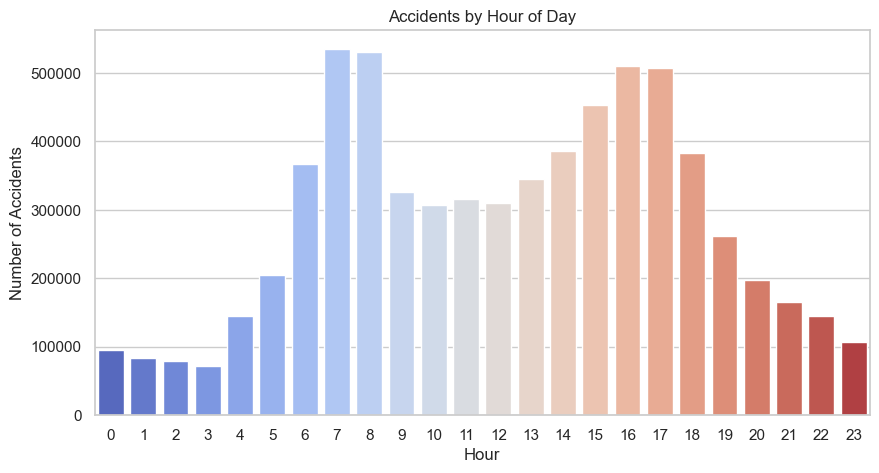

In [27]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=data, palette='coolwarm')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()


## VISUALIZE ACCIDENTS FROM WEATHER CONDITIONS

C:\Users\narmadha\AppData\Local\Temp\ipykernel_25236\2200412625.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weather.values, y=top_weather.index, palette="viridis")


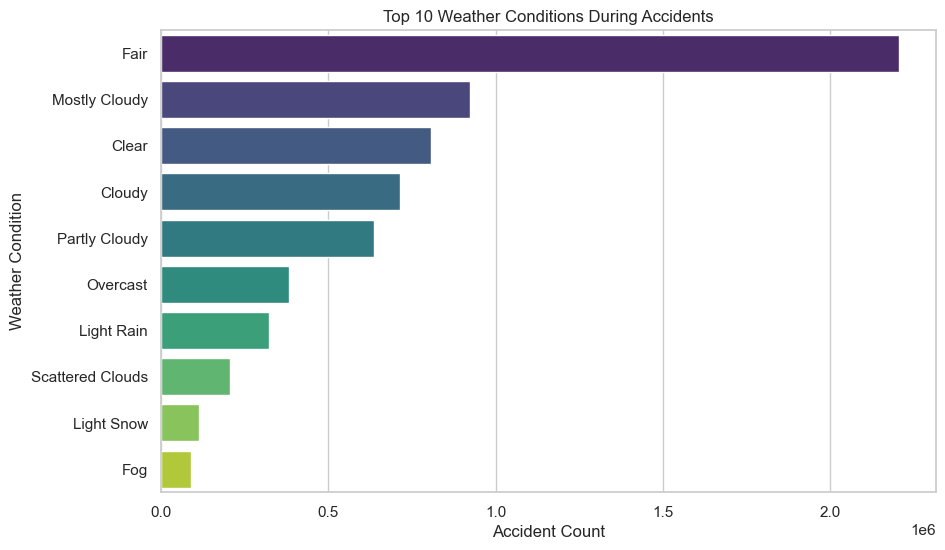

In [29]:
plt.figure(figsize=(10, 6))
top_weather = data['Weather_Condition'].value_counts().nlargest(10)
sns.barplot(x=top_weather.values, y=top_weather.index, palette="viridis")
plt.title('Top 10 Weather Conditions During Accidents')
plt.xlabel('Accident Count')
plt.ylabel('Weather Condition')
plt.show()


## ANALYZE ROAD CONDITIONS (VISIBILITY vs SEVERITY)

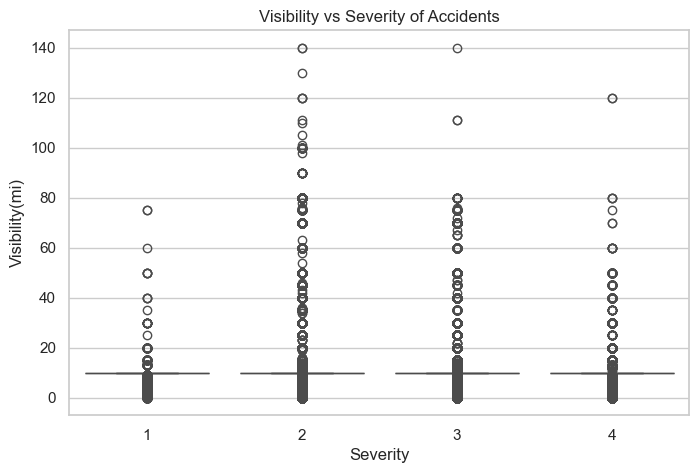

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Severity', y='Visibility(mi)', data=data)
plt.title('Visibility vs Severity of Accidents')
plt.show()


In [54]:
!pip install folium

In [41]:
import folium

# Create a map centered at some coordinates
map_center = [39.8283, -98.5795]  # Coordinates for the center of the US
m = folium.Map(location=map_center, zoom_start=5)

# Add some points (example)
folium.Marker([39.865147, -84.058723], popup='Accident Location').add_to(m)

# Save map to HTML
m.save('accident_map.html')

## HEATMAP OF ACCIDENT SPOTS

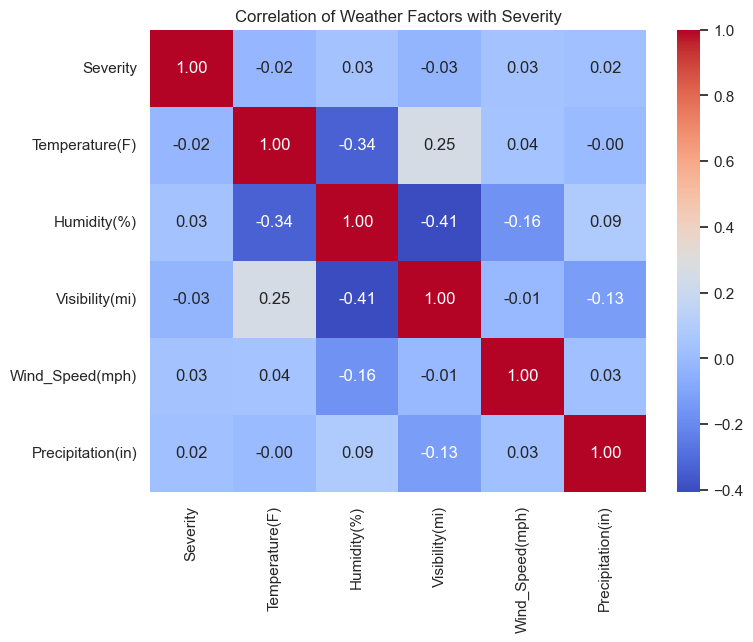

In [35]:
factors = data[['Severity', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 
              'Wind_Speed(mph)', 'Precipitation(in)']].dropna()

plt.figure(figsize=(8, 6))
sns.heatmap(factors.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation of Weather Factors with Severity")
plt.show()


In [ ]:
factors = df[['Severity', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 
              'Wind_Speed(mph)', 'Precipitation(in)']].dropna()

plt.figure(figsize=(8, 6))
sns.heatmap(factors.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation of Weather Factors with Severity")
plt.show()
